# Analyzing Cardiac data: Examining Health Factors To Predict The Presence of Heart Disease


### Introduction

Millions of people are affected by heart diseases every year.  It is the most prominent cause of death globally, taking over “17.9 million lives each year” (WHO).  Heart disease is the umbrella term referring to various conditions, such as coronary artery disease, cerebrovascular disease, peripheral artery disease, and aortic atherosclerosis.  Cholesterol and blood pressure are often linked with the risk of heart disease. Cholesterol is a lipophilic molecule and does not easily dissolve in blood. Excess amounts of cholesterol can contribute to the formation of atherosclerotic plaques, which results in several health conditions such as coronary artery disease. High blood pressure makes the heart work more to pump blood as the artery walls are too high due to the force of the blood being pushed against it. High blood sugar damages the nerves and blood vessels associated with the heart. The question we have chosen is as follows: can we diagnose a patient with heart disease based on their resting blood pressure, fasting blood sugar, and serum cholesterol?  We will be using the Cleveland database, from the UCI Machine Learning Repository’s heart disease data set to answer this predictive question.

### Preliminary Exploratory Data Analysis

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

We begin our analysis by first reading our database. The database assigns its heart disease diagnoses under the `num` column as a value of 0 to 4, where any number more than 0 indicates the presence of heart disease. Because we will only be interested in whether or not a patient has heart disease, we added a new column `diag` that returns "No" if `num` is 0 (patient does NOT have heart disease), and "Yes" for all other values.

In [2]:
# source dataset.

heartdisease_link <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heartdisease_data <- read_csv(heartdisease_link, col_names = FALSE) |>
    rename(age = X1,
           sex = X2,
           cp = X3,
           restbps = X4,
           chol = X5,
           fbs = X6,
           restecg = X7,
           thalach = X8,
           exang = X9,
           oldpeak = X10,
           slope = X11,
           ca = X12,
           thal = X13,
           num = X14) |>
    mutate(diag = case_when(num == 0 ~ "No",
                            TRUE ~ "Yes"))

glimpse(heartdisease_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 303
Columns: 15
$ age     <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44, 52, 57…
$ sex     <dbl> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,…
$ cp      <dbl> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3, 2, 4, 3, 2, 1,…
$ restbps <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, 13…
$ chol    <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 25…
$ fbs     <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,…
$ restecg <dbl> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2,…
$ thalach <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 14…
$ exang   <dbl> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,…
$ oldpeak <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, 1.3, 0.…
$ slope   <dbl> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2,…
$ ca      <chr> "0.0", "3.0", "2.0", "0.0", "0.0", "0.0", "2.0", "0.0", "1.0",…
$ thal    <chr> "6

Rows: 226
Columns: 15
$ age     <dbl> 41, 56, 57, 44, 52, 57, 49, 64, 58, 50, 58, 66, 43, 69, 59, 44…
$ sex     <dbl> 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,…
$ cp      <dbl> 2, 2, 4, 2, 3, 3, 2, 1, 1, 3, 3, 1, 4, 1, 4, 3, 4, 1, 2, 3, 3,…
$ restbps <dbl> 130, 120, 140, 120, 172, 150, 130, 110, 150, 120, 120, 150, 15…
$ chol    <dbl> 204, 236, 192, 263, 199, 168, 266, 211, 283, 219, 340, 226, 24…
$ fbs     <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,…
$ restecg <dbl> 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,…
$ thalach <dbl> 172, 178, 148, 173, 162, 174, 171, 144, 162, 158, 172, 114, 17…
$ exang   <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,…
$ oldpeak <dbl> 1.4, 0.8, 0.4, 0.0, 0.5, 1.6, 0.6, 1.8, 1.0, 1.6, 0.0, 2.6, 1.…
$ slope   <dbl> 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2,…
$ ca      <chr> "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0",…
$ thal    <chr> "3

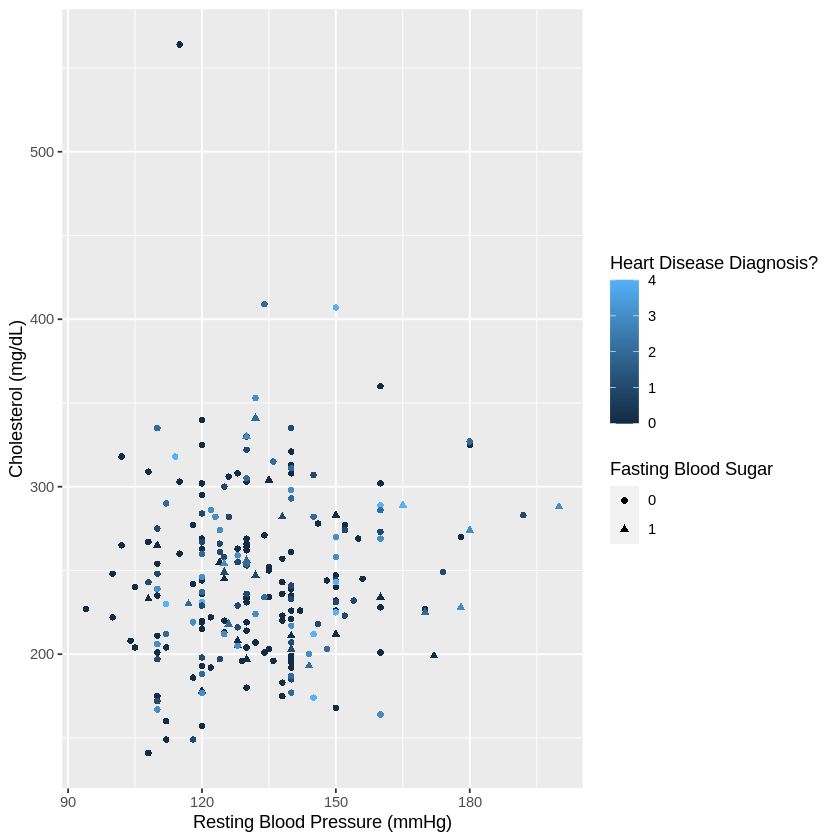

In [3]:
# training set.

heartdisease_split <- initial_split(heartdisease_data, prop = 0.75, strata = num)
heartdisease_train <- training(heartdisease_split)
heartdisease_test <- testing(heartdisease_split)

glimpse(heartdisease_train)

knn_spec <-  nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
       set_engine("kknn") |>
       set_mode("classification")
knn_fit <- knn_spec |> 
        fit(as.factor(diag) ~ restbps + chol, data = heartdisease_train)

# plotted training set.

heartdiseaseplot <- heartdisease_train |>
ggplot(aes(x = restbps, y = chol, shape = as.factor(fbs), color = num)) + 
        geom_point() +
labs(x = "Resting Blood Pressure (mmHg)",
     y = "Cholesterol (mg/dL)",
     shape = "Fasting Blood Sugar",
     color = "Heart Disease Diagnosis?",)
heartdiseaseplot 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



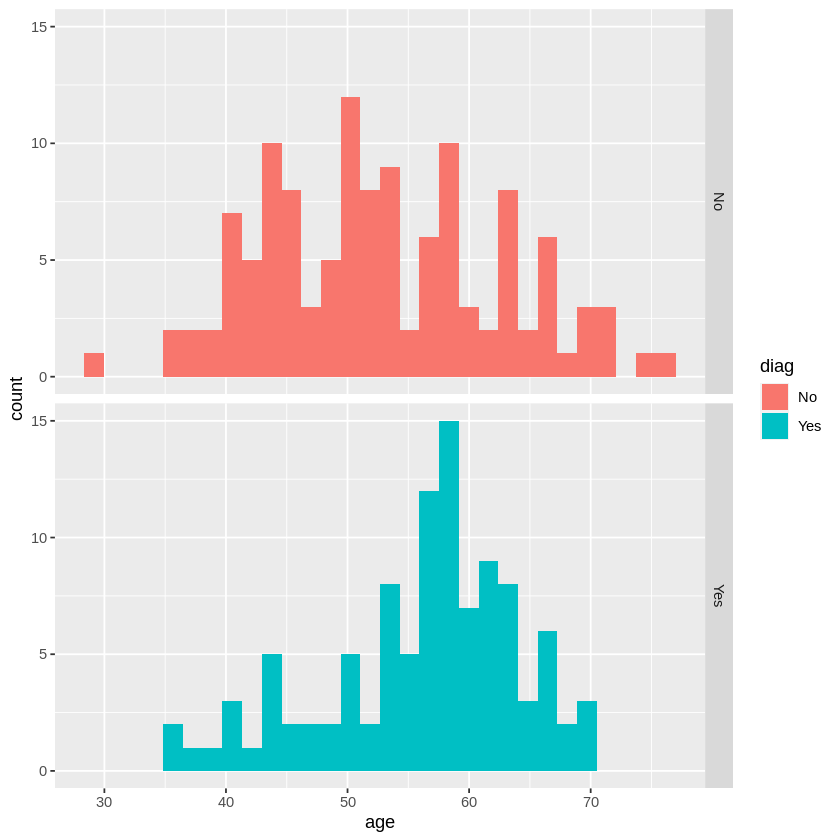

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



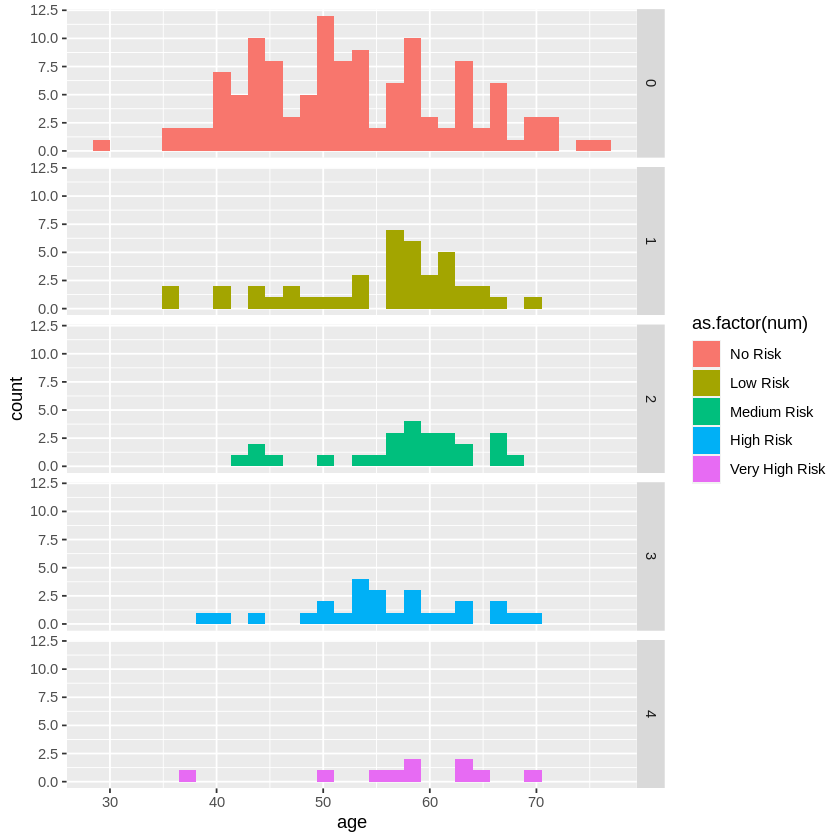

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



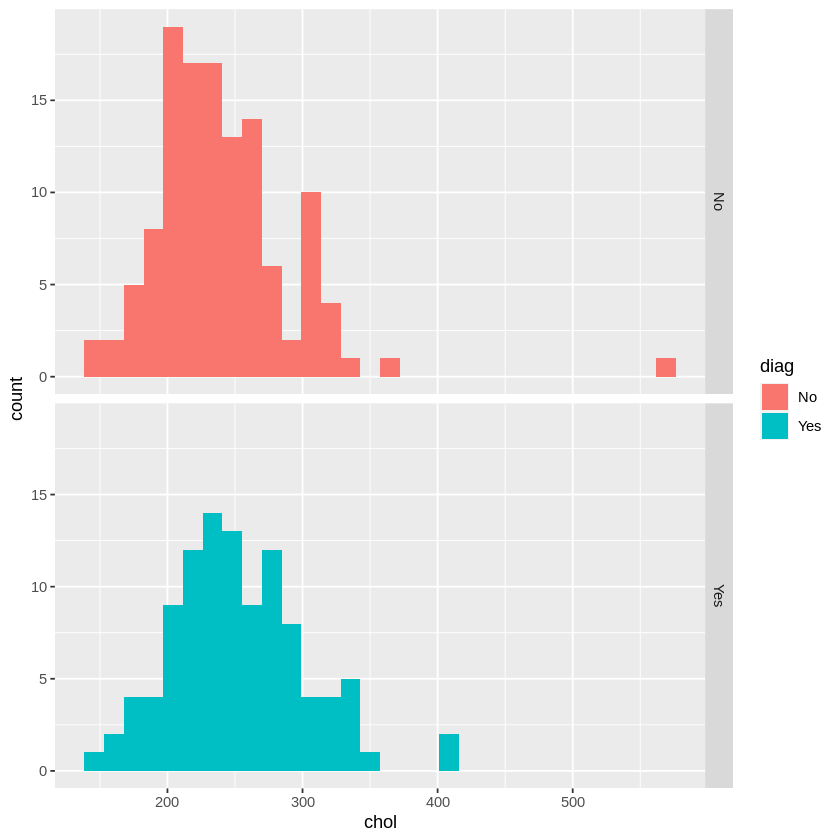

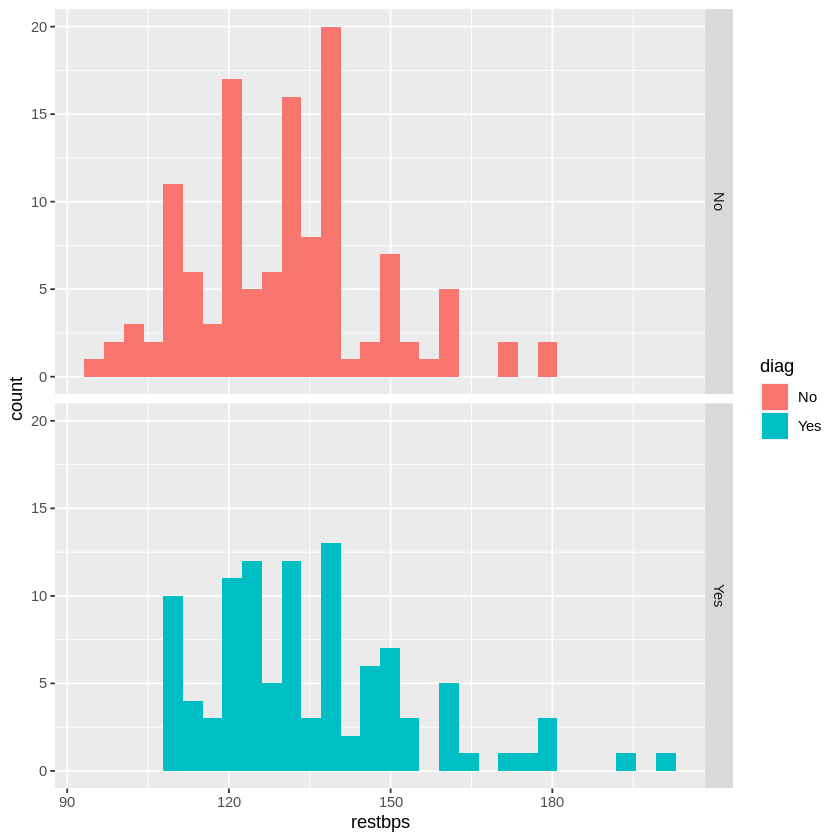

In [5]:
# visualizing the age predictor

train_plot_age <- heartdisease_train |>
    ggplot(aes(x = age, fill = diag)) + 
    geom_histogram(position = "identity") + 
    facet_grid(rows = vars(diag))
train_plot_age

# visualizing the age predictor according to num
train_plot_age_num <- heartdisease_train |>
    ggplot(aes(x = age, fill = as.factor(num))) + 
    geom_histogram(position = "identity") +
scale_fill_hue(labels = c("No Risk", "Low Risk", "Medium Risk", "High Risk", "Very High Risk")) +
    facet_grid(rows = vars(as.factor(num)))
train_plot_age_num

# visualizing the cholesterol predictor
train_plot_chol <- heartdisease_train |>
    ggplot(aes(x = chol, fill = diag)) + 
    geom_histogram(position = "identity") + 
    facet_grid(rows = vars(diag))
train_plot_chol

# visualizing the blood pressure predictor
train_plot_bps <- heartdisease_train |>
    ggplot(aes(x = restbps, fill = diag)) + 
    geom_histogram(position = "identity") + 
    facet_grid(rows = vars(diag))
train_plot_bps

### Methods

The variables that we will be examining to predict the presence of heart disease include resting blood pressure, fasting blood sugar, and serum cholesterol. We can determine this by using the “classification” method. This will involve processes like creating “recipes”, training the data, as well as making a workflow. To make the analysis of this question more simple, we will likely plot out our manipulated data in the form of a scatter plot. This visualization will make it clear whether or not the patient has heart disease. By using colors and labels to organize our scatter plot we will be better able to analyze our data.

### Expected Outcomes and Significance

After plotting our data, we expect to find the presence of heart disease in patients who have a higher resting blood pressure, blood sugar and high cholesterol. Typically people with higher blood sugar and cholesterol are more at risk for diseases. These findings could be vital in saving the lives of the patients as heart disease can be manageable with the proper treatment.  Heart disease is a dangerous condition and so it is incredibly important to determine whether or not a person’s symptoms are indicating that they are at risk, or already have heart disease. Future questions from these findings could be around what the proper form of treatment is, how severe the condition is, and any lifestyle changes that need to be taken as preventative measures.